### Monte Carlo Estimation ###

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy import stats
import random as rdm

$$ f(x) = \int_0^1 x^{-\alpha} e^{-x} \;dx $$

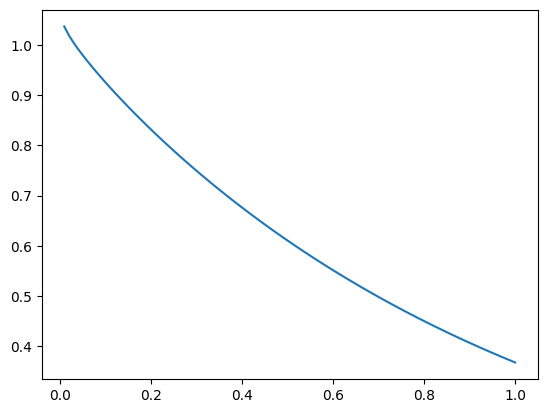

Integral: 0.640177


In [3]:
### FUNCTION INITIALIZATION ###

alpha = 0.01
f = lambda x: x**(-alpha) * np.exp(-x) # function
X = np.mgrid[1e-2:1:100j] # x mesh

plt.plot(X, f(X))
plt.show()

exp_result, error = quad(f, 0, 1) # calculate integral
print("Integral:", "%.6f" % exp_result)

In [97]:
## PARAMETERS ###

lower_bound = 0.0  # lower bound of integration range
upper_bound = 1.0 # upper bound of integration range
n = 10000  # number of samples
print_intervals = [10, 100, 1000] # step intervals to print results at

In [98]:
### MONTE CARLO INTEGRATION ###

def monte_carlo_integration(f, lower_bound, upper_bound, n):
    sum = 0.0
    for i in range(n):
        # generate random sample within the specified range
        sample = np.random.uniform(lower_bound, upper_bound)
        
        # evaluate the target function at the sample point and add it to the total
        sum += f(sample)

        for j in range(len(print_intervals)):
            if i == print_intervals[j]:
                estimated_integral = sum / i * (upper_bound - lower_bound)
                print("n =", i, ":", "%.6f" % estimated_integral)
                step_error[j] = estimated_integral - result
                
    # calculate the estimated integral by averaging the function values and scaling by the range
    estimated_integral = sum / n * (upper_bound - lower_bound)
    return estimated_integral

result = monte_carlo_integration(f, lower_bound, upper_bound, n)
step_error[len(print_intervals)] = result

print("Estimated Integral: ( n =", n, ") :", "%.6f" % result)
print("Integral:", "%.6f" % exp_result)

n = 10 : 0.728527
n = 100 : 0.629192
n = 1000 : 0.644435
Estimated Integral: ( n = 10000 ) : 0.641129
Integral: 0.640177


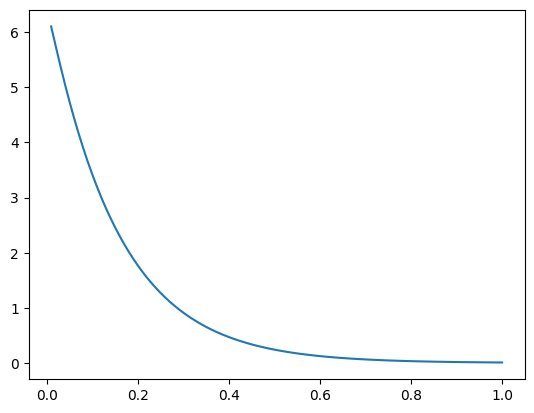

Integral: 0.9986938632640294


In [105]:
### GAMMA FUNCTION ###

# define the parameters of the gamma distribution for importance sampling
gamma_shape = alpha + 1
gamma_scale = 0.15

# create a gamma distribution object
gamma_dist = stats.gamma(a=gamma_shape, scale=gamma_scale)
gamma_func = lambda x: gamma_dist.pdf(x)

# plot
plt.plot(X, gamma_func(X))
plt.show()

# print integral (looking for normalization over interval)
print("Integral:", quad(gamma_func, 0, 1)[0])

In [106]:
### IMPORTANCE SAMPLING MONTE CARLO INTEGRATION ###

w = lambda x: stats.uniform(lower_bound, upper_bound).pdf(x) / gamma_dist.pdf(x)

def monte_carlo_integration(f, lower_bound, upper_bound, n):
    sum = 0.0
    count_within_bounds = 0  # counter for samples within bounds
    for i in range(n):
        # sample from the gamma distribution
        sample = gamma_dist.rvs()
        
        # check if the sample is within the integration range
        if lower_bound <= sample <= upper_bound:
            count_within_bounds += 1
            # calculate the importance weight (ratio of target to gamma distribution)
            importance_weight = w(sample) * f(sample)
            # add the weighted sample to the total
            sum += importance_weight

        for j in range(len(print_intervals)):
            if i == print_intervals[j]:
                print("n =", i, ":", "%.6f" % ((sum / count_within_bounds) * (upper_bound - lower_bound)))

    # calculate the estimated integral based on the samples within bounds
    if count_within_bounds > 0:
        estimated_integral = (sum / count_within_bounds) * (upper_bound - lower_bound)
    else:
        estimated_integral = 0.0

    return estimated_integral

result = monte_carlo_integration(f, lower_bound, upper_bound, n)

print("Estimated Integral: ( n =", n, ") :", "%.6f" % result)
print("Integral:", "%.6f" % exp_result)

n = 10 : 0.366307
n = 100 : 0.838182
n = 1000 : 0.715726
Estimated Integral: ( n = 10000 ) : 0.642709
Integral: 0.640177
